In [1]:

# === Common Imports ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make plots a bit larger
plt.rcParams["figure.figsize"] = (6,4)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error,
                             accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_curve, auc, jaccard_score)
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA

# Optional: SciPy for dendrogram (only used if available)
try:
    from scipy.cluster.hierarchy import dendrogram, linkage
    SCIPY_OK = True
except Exception:
    SCIPY_OK = False

import os

RANDOM_STATE = 42

# === Small helpers ===
def ensure_csv_or_make(df, fname):
    # If fname exists, return pd.read_csv(fname); else save df to fname then read+return.
    if os.path.exists(fname):
        return pd.read_csv(fname)
    else:
        df.to_csv(fname, index=False)
        return df

def plot_actual_vs_pred(y_true, y_pred, title="Actual vs Predicted"):
    plt.figure()
    plt.scatter(y_true, y_pred, alpha=0.7)
    mn = min(y_true.min(), y_pred.min())
    mx = max(y_true.max(), y_pred.max())
    plt.plot([mn, mx], [mn, mx])
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.show()

def print_regression_metrics(y_true, y_pred):
    print("R2:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", mean_squared_error(y_true, y_pred, squared=False))

def plot_confusion_matrix_basic(cm, class_names=None, title="Confusion Matrix"):
    plt.figure()
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    import numpy as _np
    tick_marks = _np.arange(cm.shape[0])
    if class_names is None:
        class_names = [str(i) for i in range(cm.shape[0])]
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


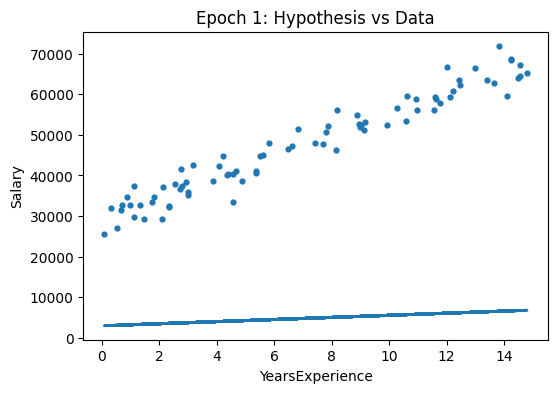

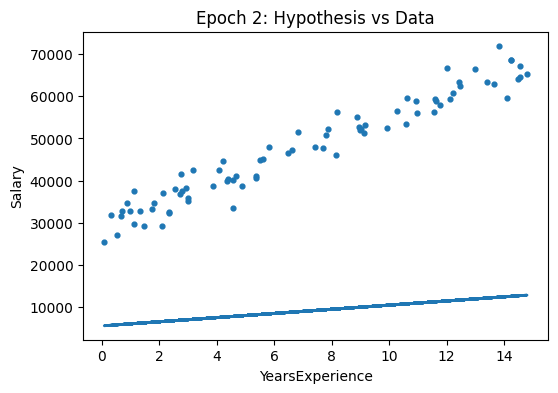

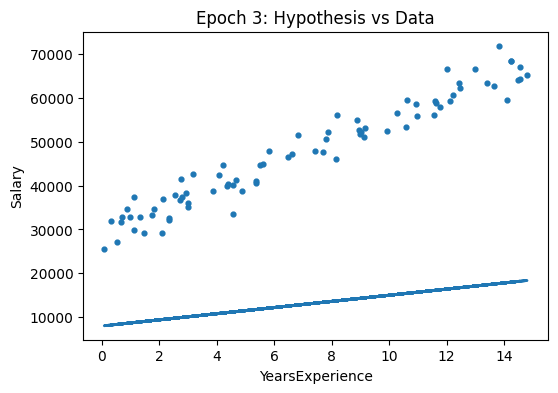

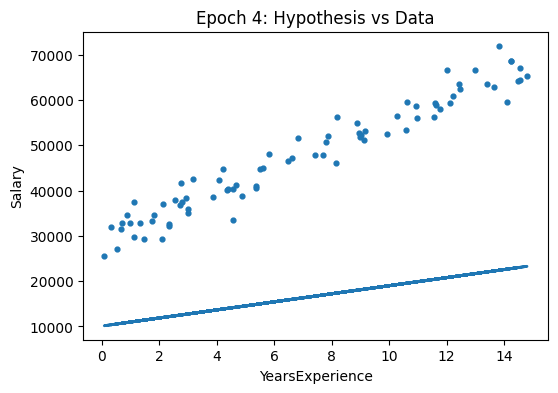

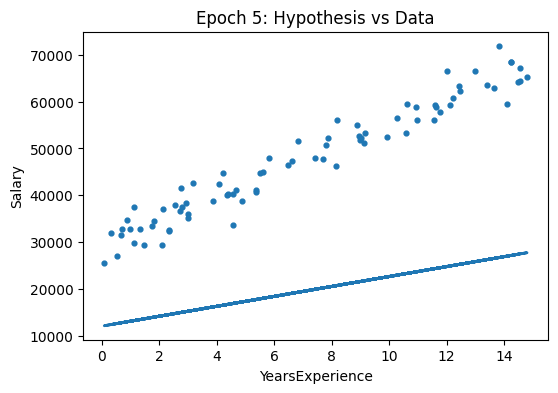

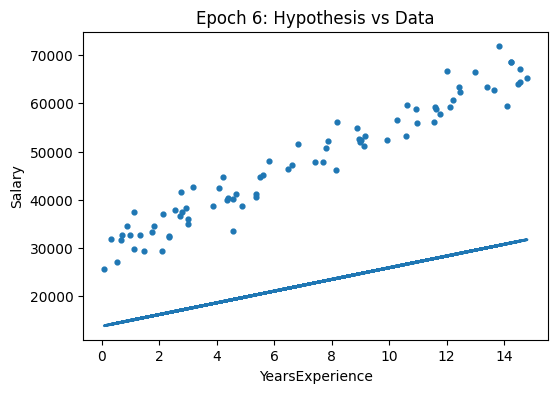

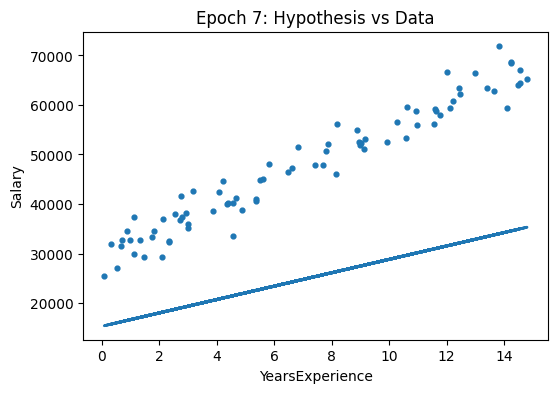

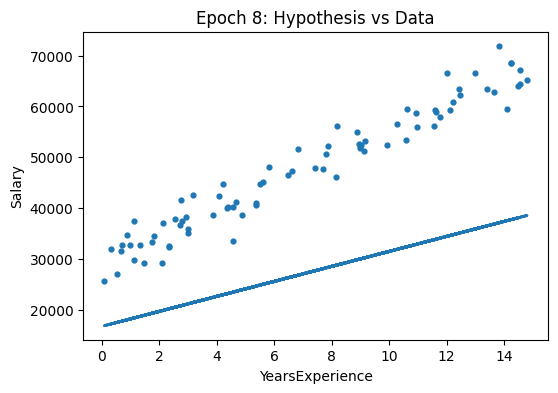

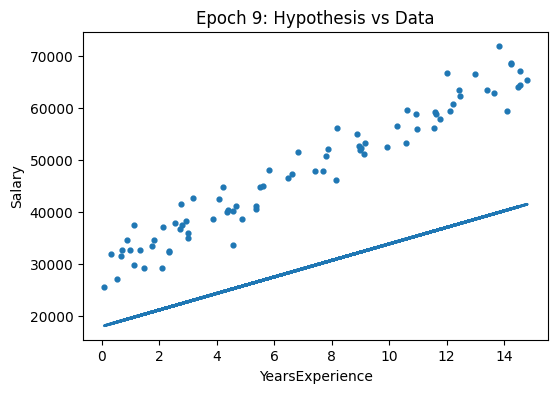

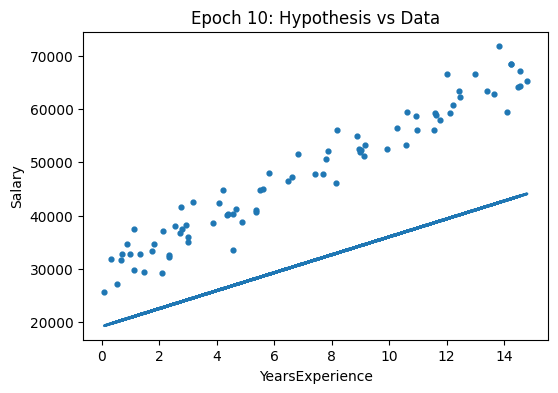

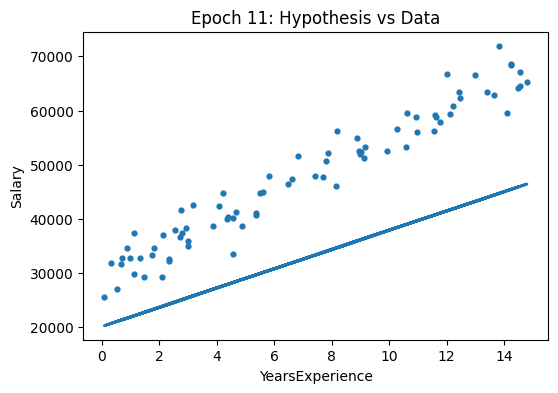

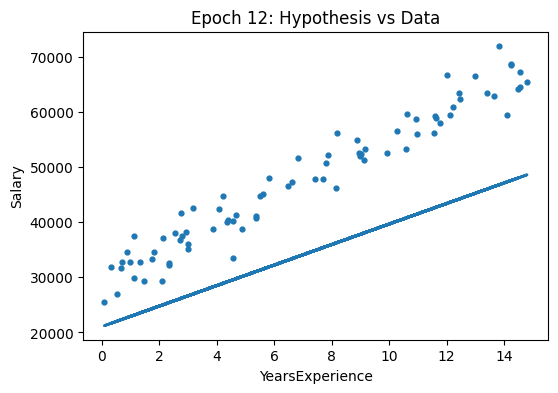

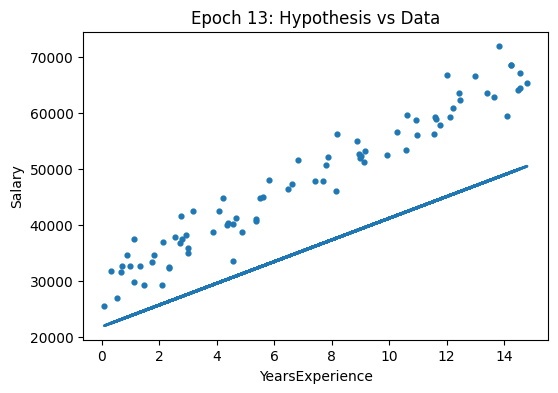

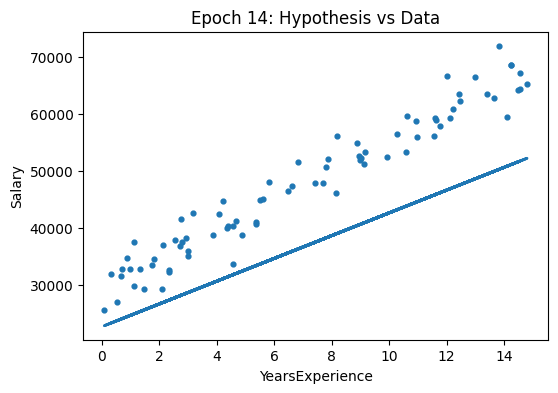

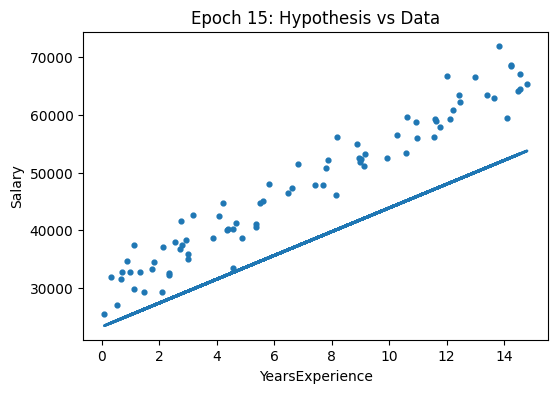

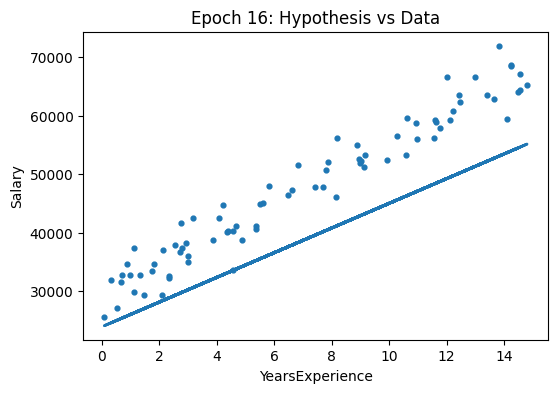

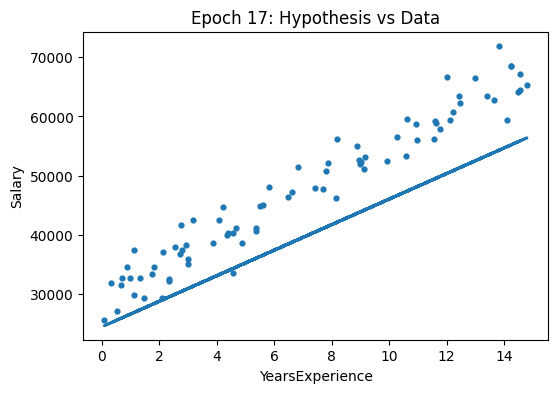

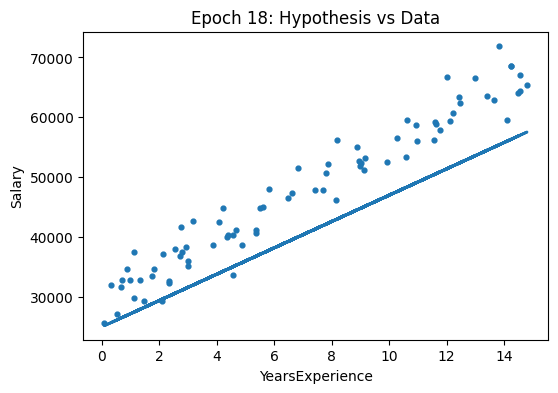

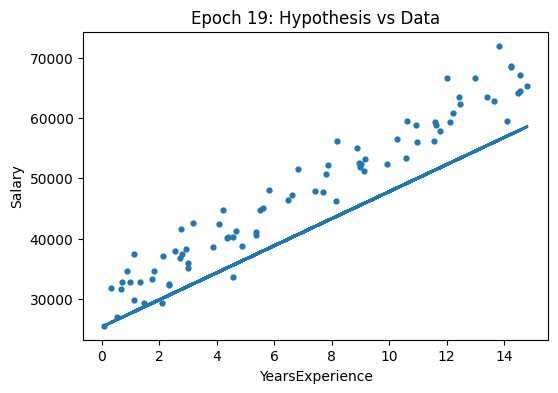

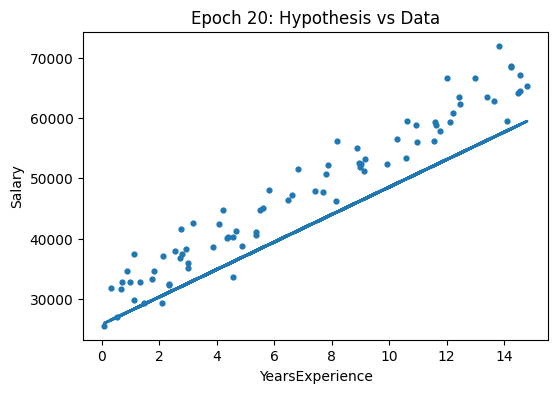

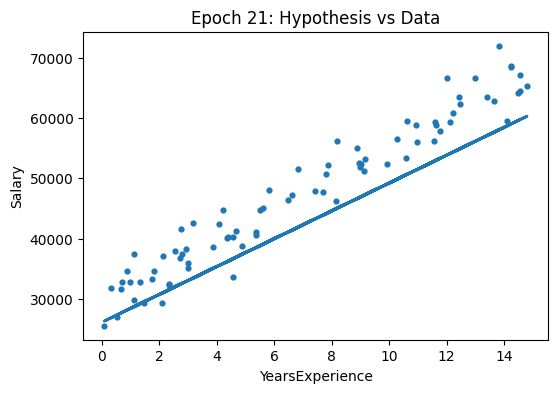

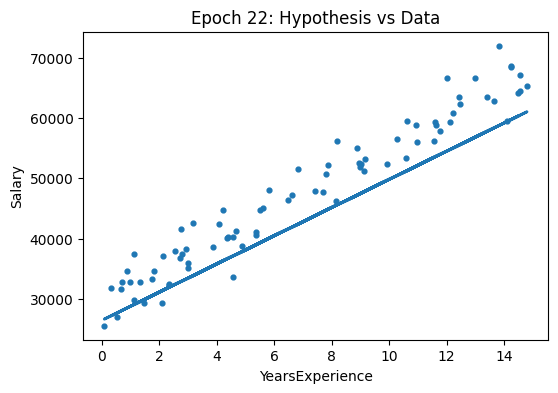

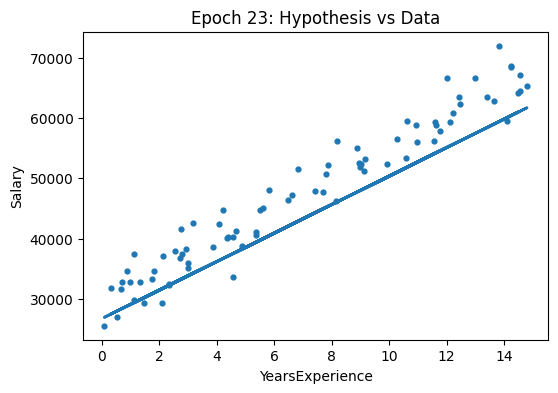

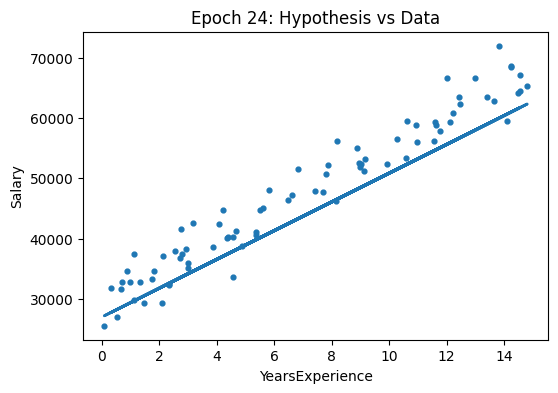

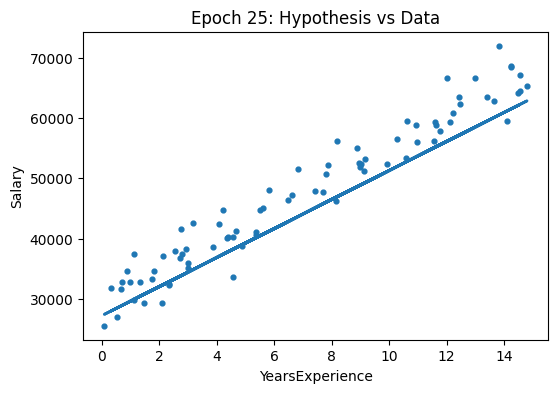

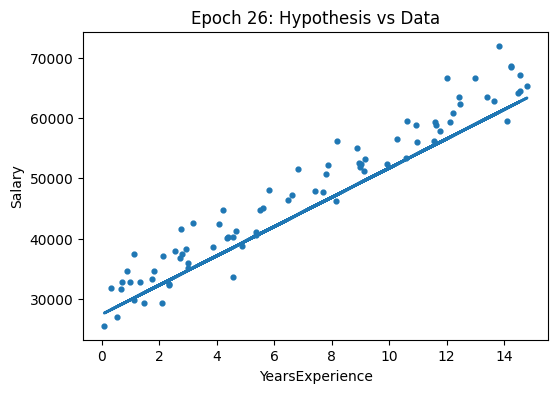

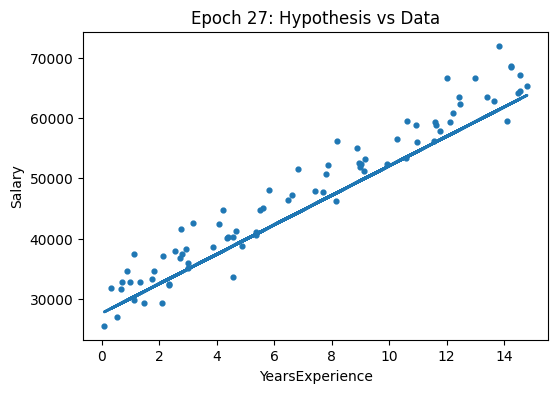

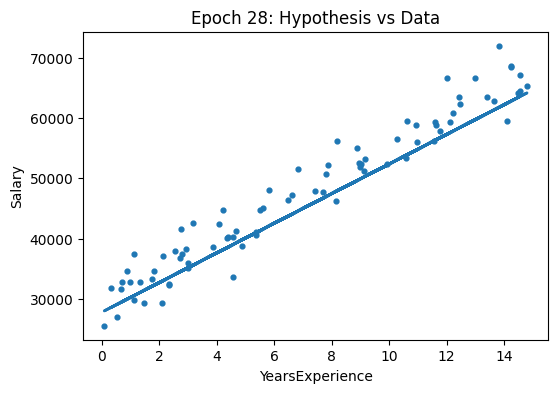

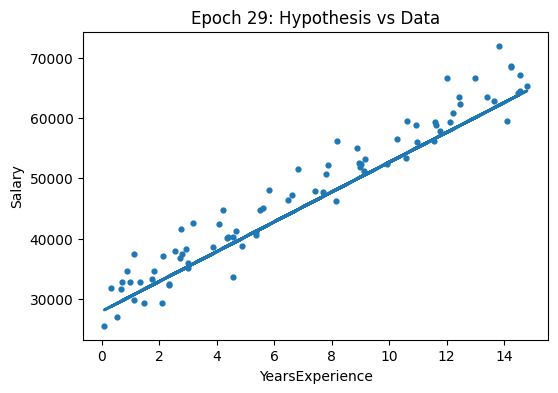

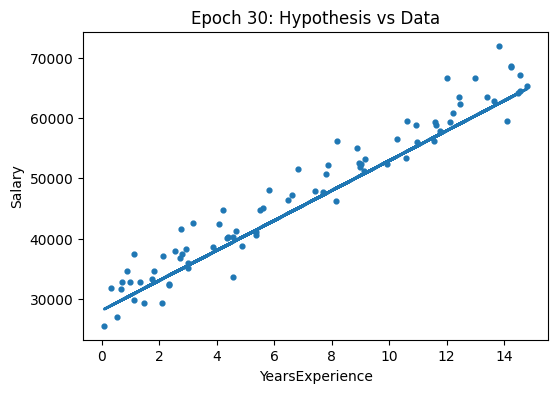

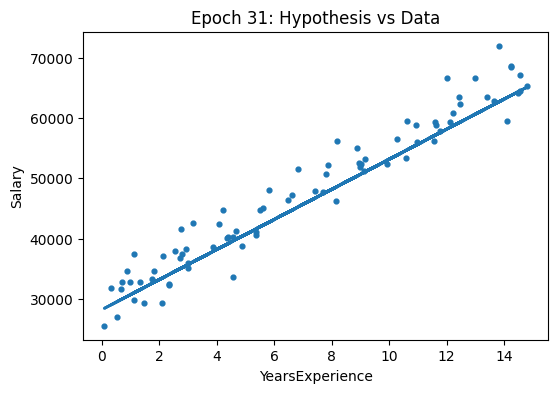

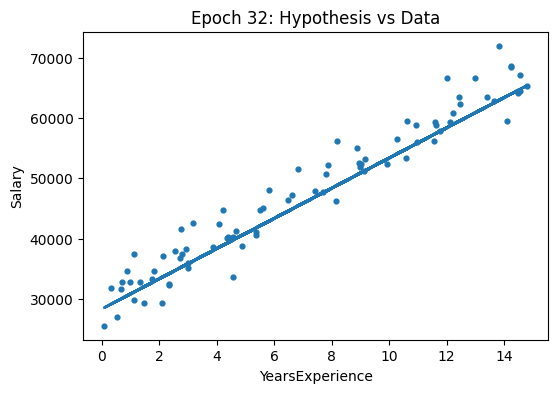

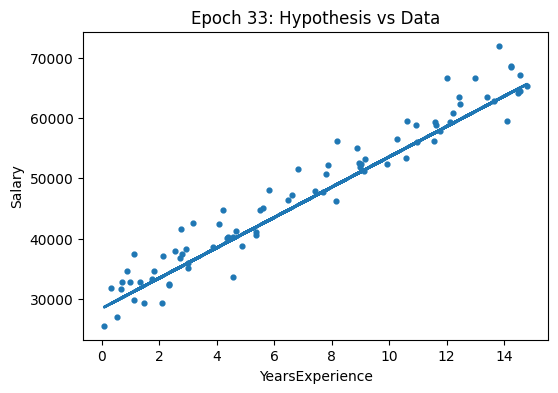

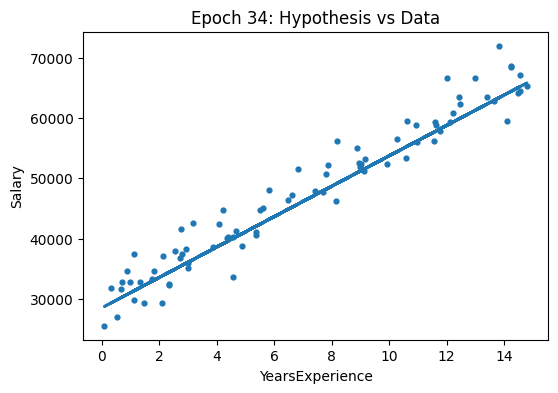

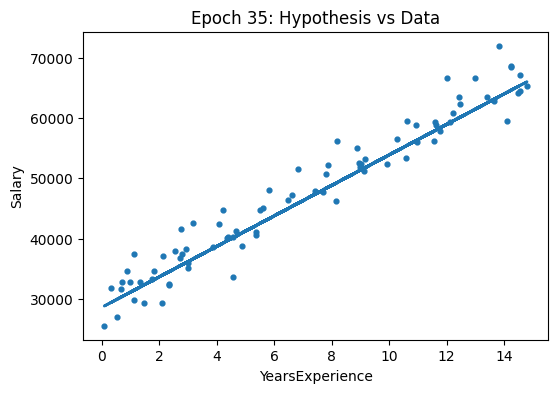

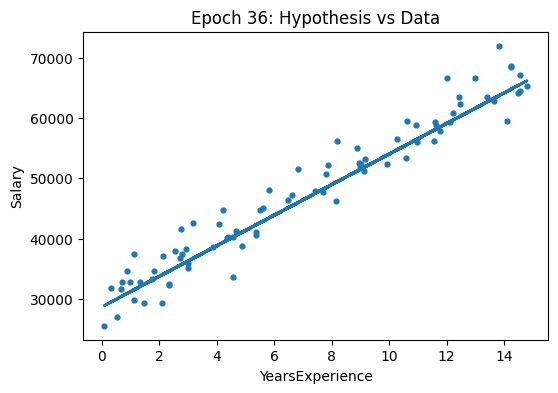

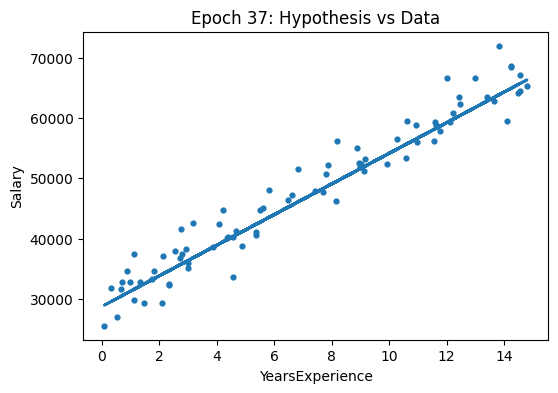

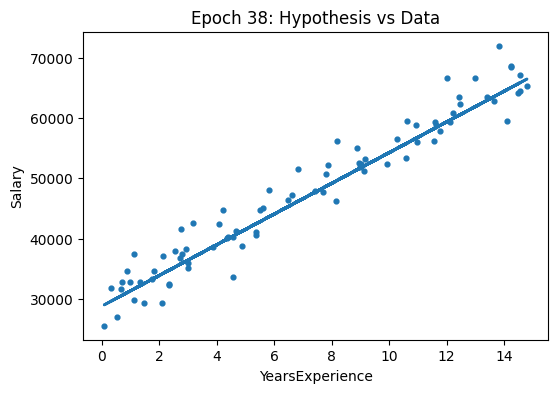

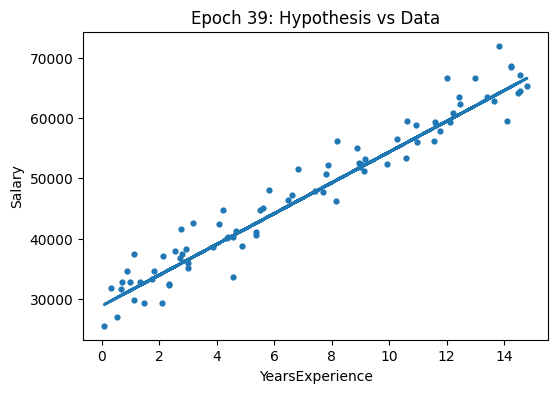

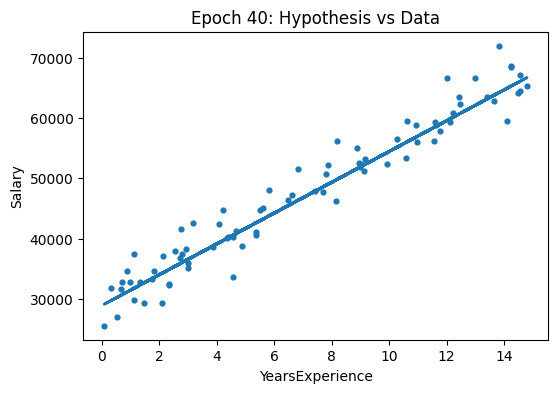

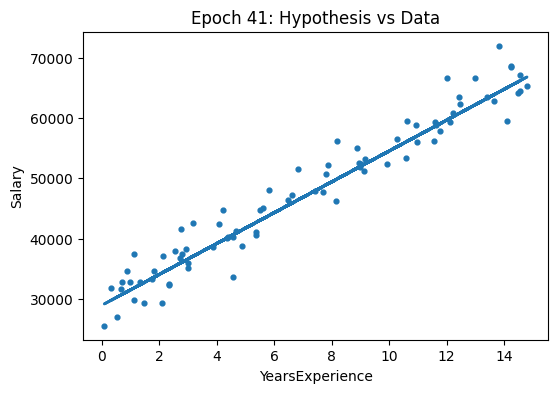

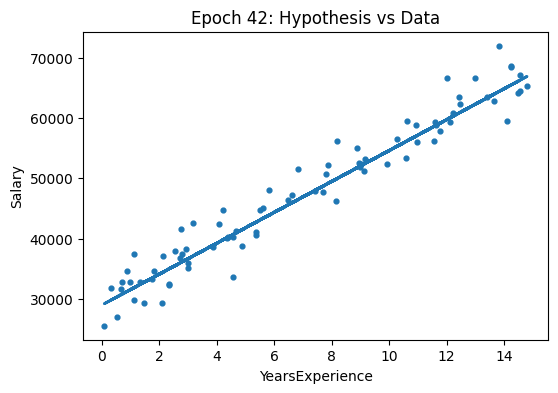

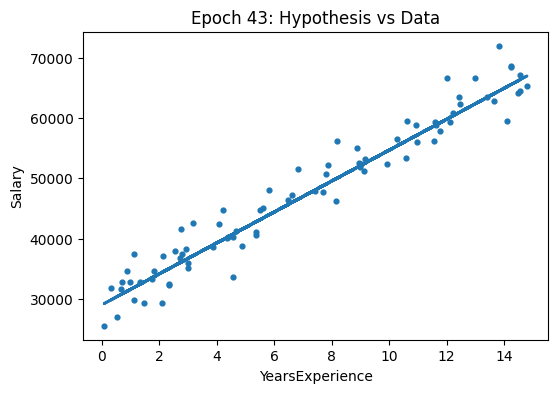

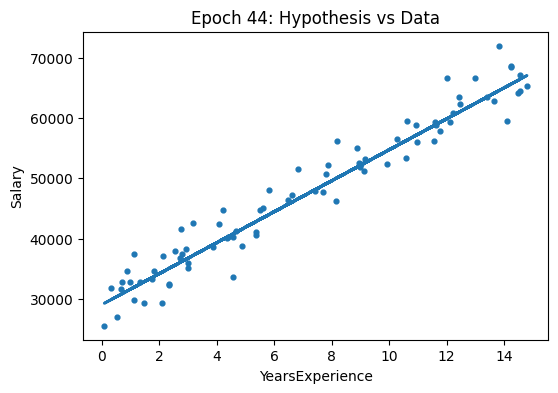

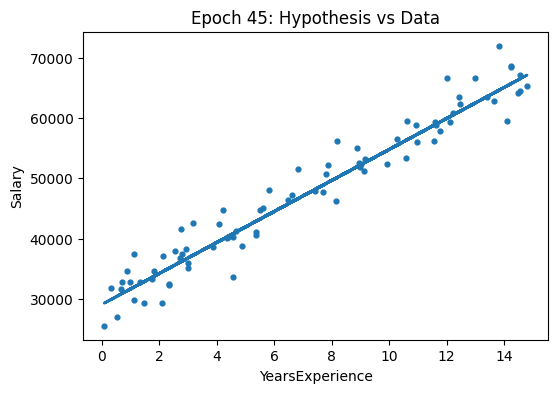

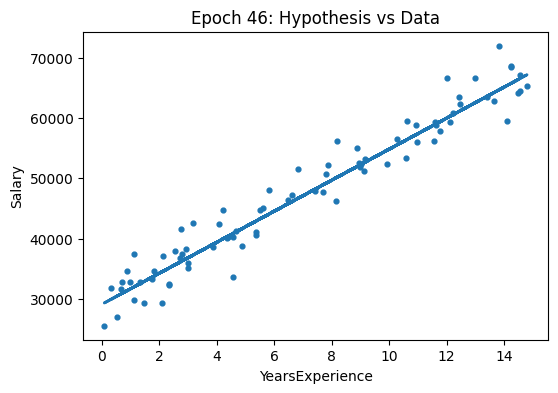

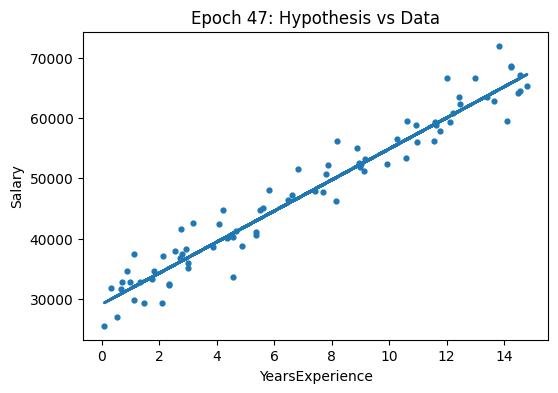

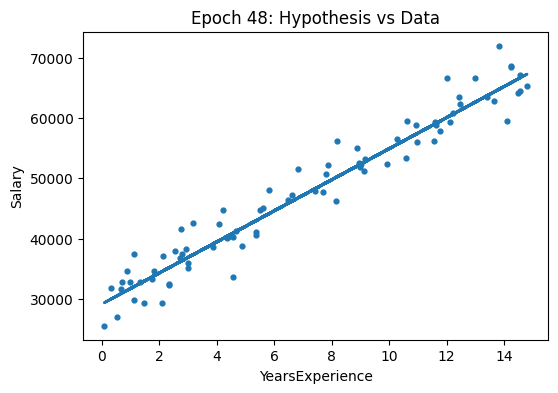

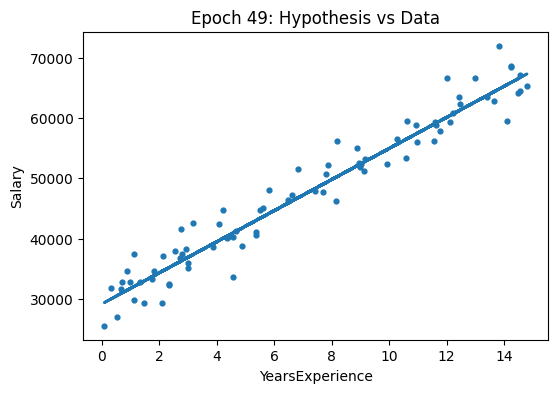

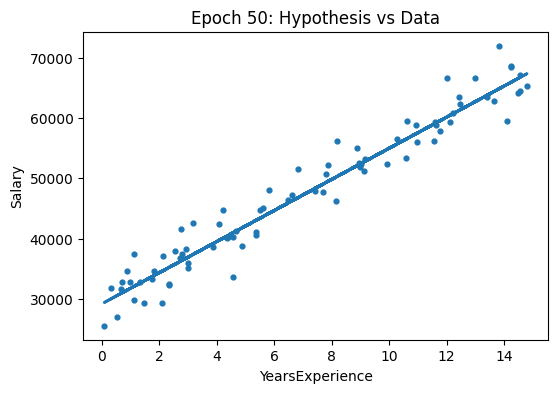

Final R2: 0.9446837130737443
MAE: 2222.897995068222


TypeError: got an unexpected keyword argument 'squared'

In [2]:

fname = "salary_dataset.csv"
if not os.path.exists(fname):
    np.random.seed(RANDOM_STATE)
    n = 80
    Xs = np.random.uniform(0, 15, size=n)
    ys = 30000 + 2500*Xs + np.random.normal(0, 3000, size=n)
    df = pd.DataFrame({"YearsExperience": Xs, "Salary": ys})
    df = ensure_csv_or_make(df, fname)

data = pd.read_csv(fname)
x = data.iloc[:, 0].values.reshape(-1,1).astype(float)
y = data.iloc[:, 1].values.astype(float)

x_mu, x_sigma = x.mean(), x.std()
x_norm = (x - x_mu)/x_sigma

theta0 = 0.0
theta1 = 0.0
alpha = 0.1
epochs = 50

def predict(xn):
    return theta0 + theta1 * xn

loss_history = []

for epoch in range(epochs):
    y_hat = predict(x_norm.flatten())
    error = y_hat - y
    d0 = error.mean()
    d1 = (error * x_norm.flatten()).mean()
    theta0 -= alpha * d0
    theta1 -= alpha * d1

    mse = ((y_hat - y)**2).mean()
    loss_history.append(mse)

    plt.figure()
    plt.scatter(x.flatten(), y, s=12)
    y_line = (theta0 + theta1 * ((x - x_mu)/x_sigma)).flatten()
    plt.plot(x.flatten(), y_line, linewidth=2)
    plt.title(f"Epoch {epoch+1}: Hypothesis vs Data")
    plt.xlabel("YearsExperience")
    plt.ylabel("Salary")
    plt.show()

y_pred_final = (theta0 + theta1 * ((x - x_mu)/x_sigma)).flatten()
print("Final R2:", r2_score(y, y_pred_final))
print("MAE:", mean_absolute_error(y, y_pred_final))
print("RMSE:", mean_squared_error(y, y_pred_final, squared=False))

plt.figure()
plt.plot(loss_history)
plt.title("MSE Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()
